# Camera Sensor Noise Analysis Epson R-D1

I want to analyze the noise in the detector at different exposure times and different ISO settings, to see how how it varies.

Questions:
  - Readout noise vs. leakage noise
  - Effect of Bayer filter
  - Increase in noise with ISO setting
  - Comparison of noise profiles between cameras
  
I'm assuming the detector sensitivity is the same for each camera at a given ISO, per unit area. One day I might make a stable voltage source and use an LED to create a calibrated light source 

In [66]:
import os
import pdb

import exiftool
import rawpy
import numpy as np
import plotly.express as px
import pandas as pd
import skimage
import matplotlib.pyplot as pyplot

In [40]:
suffix = 'ERF'
path = "Epson-R-D1"
fn_list = sorted([i for i in os.listdir(path) if i.upper().endswith(suffix)])
fn_list = [os.path.join(path, i) for i in fn_list]

In [41]:
fn_list

['Epson-R-D1/_EPS0696.ERF',
 'Epson-R-D1/_EPS0697.ERF',
 'Epson-R-D1/_EPS0698.ERF',
 'Epson-R-D1/_EPS0699.ERF',
 'Epson-R-D1/_EPS0700.ERF',
 'Epson-R-D1/_EPS0701.ERF',
 'Epson-R-D1/_EPS0702.ERF',
 'Epson-R-D1/_EPS0703.ERF',
 'Epson-R-D1/_EPS0704.ERF',
 'Epson-R-D1/_EPS0705.ERF',
 'Epson-R-D1/_EPS0706.ERF',
 'Epson-R-D1/_EPS0707.ERF',
 'Epson-R-D1/_EPS0708.ERF',
 'Epson-R-D1/_EPS0709.ERF',
 'Epson-R-D1/_EPS0710.ERF',
 'Epson-R-D1/_EPS0711.ERF',
 'Epson-R-D1/_EPS0712.ERF',
 'Epson-R-D1/_EPS0713.ERF',
 'Epson-R-D1/_EPS0714.ERF',
 'Epson-R-D1/_EPS0715.ERF',
 'Epson-R-D1/_EPS0716.ERF',
 'Epson-R-D1/_EPS0717.ERF',
 'Epson-R-D1/_EPS0718.ERF',
 'Epson-R-D1/_EPS0719.ERF',
 'Epson-R-D1/_EPS0720.ERF',
 'Epson-R-D1/_EPS0721.ERF',
 'Epson-R-D1/_EPS0722.ERF',
 'Epson-R-D1/_EPS0723.ERF',
 'Epson-R-D1/_EPS0724.ERF',
 'Epson-R-D1/_EPS0725.ERF',
 'Epson-R-D1/_EPS0726.ERF',
 'Epson-R-D1/_EPS0727.ERF',
 'Epson-R-D1/_EPS0728.ERF',
 'Epson-R-D1/_EPS0729.ERF',
 'Epson-R-D1/_EPS0730.ERF',
 'Epson-R-D1/_EPS073

In [42]:
with exiftool.ExifToolHelper() as et:
    metadata = et.get_metadata(fn_list)

In [43]:
len(metadata)

60

In [45]:
metadata[59]

{'SourceFile': 'Epson-R-D1/_EPS0766.ERF',
 'ExifTool:ExifToolVersion': 12.4,
 'File:FileName': '_EPS0766.ERF',
 'File:Directory': 'Epson-R-D1',
 'File:FileSize': 9912152,
 'File:FileModifyDate': '2023:11:25 07:45:02-07:00',
 'File:FileAccessDate': '2023:11:25 14:48:59-07:00',
 'File:FileInodeChangeDate': '2023:11:25 14:48:59-07:00',
 'File:FilePermissions': 100644,
 'File:FileType': 'ERF',
 'File:FileTypeExtension': 'ERF',
 'File:MIMEType': 'image/x-epson-erf',
 'File:ExifByteOrder': 'MM',
 'EXIF:ImageDescription': 'EPSON DSC Picture',
 'EXIF:Make': 'SEIKO EPSON CORP.',
 'EXIF:Model': 'R-D1',
 'EXIF:Orientation': 1,
 'EXIF:Software': 'E04106-0200',
 'EXIF:ModifyDate': '2023:11:25 14:44:42',
 'EXIF:SubfileType': 0,
 'EXIF:ImageWidth': 3040,
 'EXIF:ImageHeight': 2024,
 'EXIF:BitsPerSample': 12,
 'EXIF:Compression': 32769,
 'EXIF:PhotometricInterpretation': 32803,
 'EXIF:StripOffsets': 59108,
 'EXIF:SamplesPerPixel': 1,
 'EXIF:RowsPerStrip': 2024,
 'EXIF:StripByteCounts': 9844736,
 'EXIF:

In [48]:
metadata[0].get('EXIF:Model')

'R-D1'

In [49]:
metadata[0].get('EXIF:BitsPerSample')

12

In [50]:
metadata[0].get('MakerNotes:BlackLevel')

'0 0 0 0'

In [51]:
metadata[0].get('EXIF:ISO')

400

In [52]:
metadata[0].get('SourceFile')

'Epson-R-D1/_EPS0696.ERF'

In [11]:
metadata[0].get('EXIF:ExposureTime')

6.964

In [12]:
fn_list[0]

'Epson-R-D1/_EPS0696.ERF'

## List all the ISO's in the folder

In [53]:
sorted(list(set([(i.get('EXIF:ExposureTime'), i.get('EXIF:ISO')) for i in metadata])))

[(0.0005, 200),
 (0.0005, 400),
 (0.0005, 800),
 (0.0005, 1600),
 (0.001, 200),
 (0.001, 400),
 (0.001, 800),
 (0.001, 1600),
 (0.002, 200),
 (0.002, 400),
 (0.002, 800),
 (0.002, 1600),
 (0.003649635036, 1600),
 (0.004, 200),
 (0.004, 400),
 (0.004, 800),
 (0.004, 1600),
 (0.005524861878, 1600),
 (0.008, 200),
 (0.008, 400),
 (0.008, 800),
 (0.008, 1600),
 (0.009615384615, 1600),
 (0.01666666667, 200),
 (0.01666666667, 400),
 (0.01666666667, 800),
 (0.01666666667, 1600),
 (0.03333333333, 200),
 (0.03333333333, 400),
 (0.03333333333, 800),
 (0.03333333333, 1600),
 (0.05, 1600),
 (0.06666666667, 200),
 (0.06666666667, 400),
 (0.06666666667, 800),
 (0.06666666667, 1600),
 (0.125, 200),
 (0.125, 400),
 (0.125, 800),
 (0.125, 1600),
 (0.25, 200),
 (0.25, 400),
 (0.25, 800),
 (0.25, 1600),
 (0.5, 200),
 (0.5, 400),
 (0.5, 800),
 (0.5, 1600),
 (1, 200),
 (1, 400),
 (1, 800),
 (1, 1600),
 (5.383, 1600),
 (6.964, 400)]

In [14]:
raw = rawpy.imread(fn_list[1])

Looks like the Pixii is using 12-bit images which is surprising, would have expected 14 or more.

In [15]:
raw.white_level

4095

In [16]:
raw.raw_type

<RawType.Flat: 0>

In [17]:
raw.black_level_per_channel

[0, 0, 0, 0]

In [18]:
import imageio

The Leica Q has neutral grey strip at row 6011, so only keep columns 0 through 6010 inclusiv

In [19]:
raw.raw_image

array([[0, 0, 0, ..., 3, 2, 2],
       [0, 0, 0, ..., 3, 6, 1],
       [1, 0, 0, ..., 0, 0, 3],
       ...,
       [2, 0, 4, ..., 4, 4, 0],
       [1, 0, 2, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 2]], dtype=uint16)

In [20]:
raw.raw_image.shape

(2024, 3040)

Create a normalized image, 0 to 1

## Viewing scaled noise

In [26]:
area = [int(i) for i in metadata[0].get('MakerNotes:SensorArea').split(' ')]

View an individual image by ISO and exposure time

In [38]:
area

[0, 0, 3040, 2024]

Text(0.5, 1.0, 'ISO1600, EXP5.383000, mean=0.968963, min=0.000000, max=0.999756, std=0.025713, ev=-5.3')

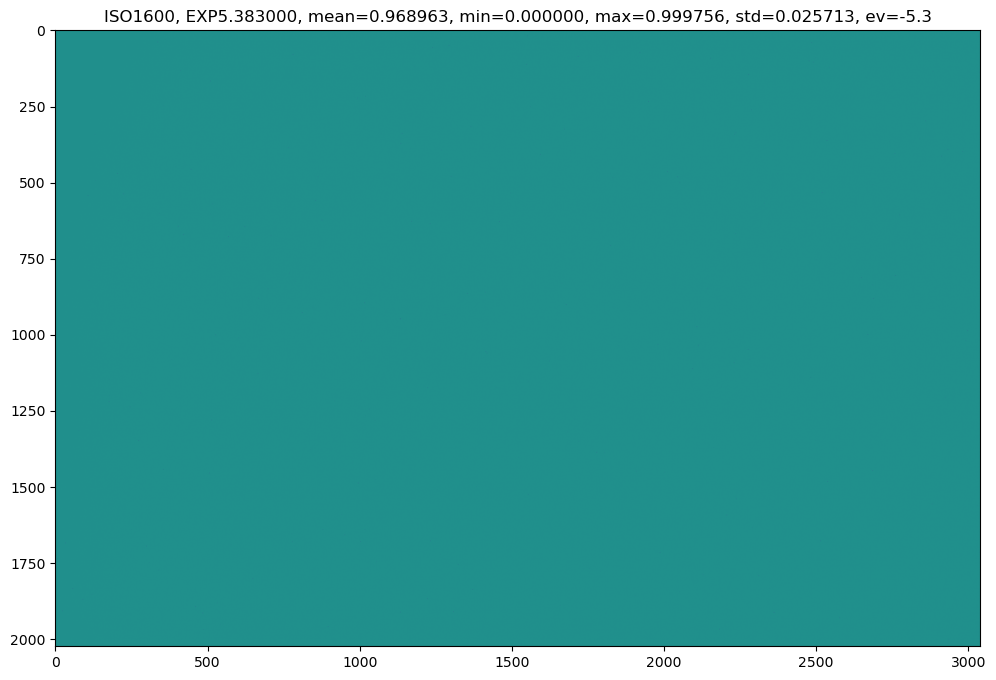

In [87]:
#iso = 1280*2
#iso = 12800
iso = 1600
exp = 5.383

fn_iso = [(i, fn) for (i, fn) in enumerate(fn_list) if metadata[i].get('EXIF:ISO') == iso]
fn_exp = [(i, fn) for (i, fn) in fn_iso if metadata[i].get('EXIF:ExposureTime') == exp]
n = fn_exp[0][0]

raw = rawpy.imread(fn_list[n])\

meta = metadata[n]

area = [int(i) for i in meta.get('MakerNotes:SensorArea').split(' ')]
iso = meta.get('EXIF:ISO')
exp = meta.get('EXIF:ExposureTime')
bits = meta.get('EXIF:BitsPerSample')
white_level = 2**bits #meta.get('EXIF:WhiteLevel') #guess, not sure where to find it
black_level = 0 #meta.get('EXIF:BlackLevel')

image = (raw.raw_image-float(black_level))/float(white_level-black_level)
#image = raw.raw_image/float(white_level-black_level)
#image_sub = image[area[0]:area[2], area[1]:area[3]]
image_sub = image[area[1]:area[3], area[0]:area[2]]
vmin = image_sub.min()
vmax = image_sub.max()
vmean = image_sub.mean()
std = image_sub.std()
ev = np.log(std)/np.log(2)

title = 'ISO%s, EXP%f, mean=%f, min=%f, max=%f, std=%f, ev=%.1f' % (
    iso, exp, vmean, vmin, vmax, std, ev
)

fig, ax = pyplot.subplots(figsize=(12,8))
ax.imshow(image_sub/image_sub.mean()/2, vmin=0, vmax=1)#, cmap='viridis'
ax.set_title(title)


In [64]:
metadata[59].get

True

In [61]:
fn_exp

[]

In [37]:
image_sub.shape

(2024, 2024)

In [90]:
rawpy.imread(fn_list[5]).raw_image

array([[2128,    0,  360, ...,    0,    0,    0],
       [   2,  125,  125, ...,    0,    0,    0],
       [   3,  126,  125, ...,    0,    0,    0],
       ...,
       [ 102,  126,  126, ...,    0,    0,    0],
       [ 103,  126,  126, ...,    0,    0,    0],
       [ 104,  125,  126, ...,    0,    0,    0]], dtype=uint16)

In [27]:
actual_image = raw.raw_image[:, 0:6030]
actual_image.shape

(4200, 6030)

In [160]:
raw.raw_image.shape

(4014, 6016)

In [28]:
imageio.imsave('test.tiff', raw.raw_image)

In [79]:
imageio.imsave('test_clean.tiff', actual_image)

In [32]:
raw.color_desc

b'RGBG'

In [29]:
raw.color_matrix

array([[ 1.8523828 ,  0.26705515, -1.1194379 ,  0.        ],
       [-0.32426944,  1.6637666 , -0.33949718,  0.        ],
       [ 0.01523797, -0.37744585,  1.3622079 ,  0.        ]],
      dtype=float32)

In [30]:
raw.daylight_whitebalance

[1.0195244550704956, 0.8540831208229065, 1.3546675443649292, 0.0]

In [164]:
raw.num_colors

3

I think this is the Bayer pattern, with the colors given in raw.color_desc

In [165]:
raw.raw_pattern

array([[0, 1],
       [3, 2]], dtype=uint8)

In [166]:
raw.color_desc

b'RGBG'

In [167]:
np.std(actual_image)

0.3644447440012462

In [168]:
np.std(raw.raw_image)

0.3644447440012462

In [23]:
np.mean(raw.raw_image)

1022.9368768294514

In [24]:
raw.close()

In [75]:
data = pd.DataFrame()

for fn in fn_list:
    with exiftool.ExifToolHelper() as et:
        metadata = et.get_metadata(fn)[0]
    raw = rawpy.imread(fn)
    
    #handle black level as string of levels per channel - happens in Leica Q
    black_level = metadata.get('EXIF:BlackLevel')
    if isinstance(black_level, str):
        black_level = int(black_level.split()[0])
        
    df = pd.DataFrame({
        'camera':[metadata.get('EXIF:UniqueCameraModel')],
        'source':[metadata.get('SourceFile')],
        'black_level':[black_level],
        'white_level':[metadata.get('EXIF:WhiteLevel')],
        'width':[metadata.get('EXIF:ExifImageWidth')],
        'height':[metadata.get('EXIF:ExifImageHeight')],
        #'white':[raw.white_level],
        'iso':[metadata.get('EXIF:ISO')],
        'time':[metadata.get('EXIF:ExposureTime')],
        'std':[np.std(raw.raw_image)],
        'mean':[np.mean(raw.raw_image)],
        'min':[np.min(raw.raw_image)],
        'max':[np.max(raw.raw_image)],
    })
    data = pd.concat([data, df])
    raw.close()
#exposure value - (max digital range)/(std dev)
data['EV'] = data.apply(lambda x: np.log((x['white_level']-x['black_level'])/x['std'])/np.log(2), axis='columns')

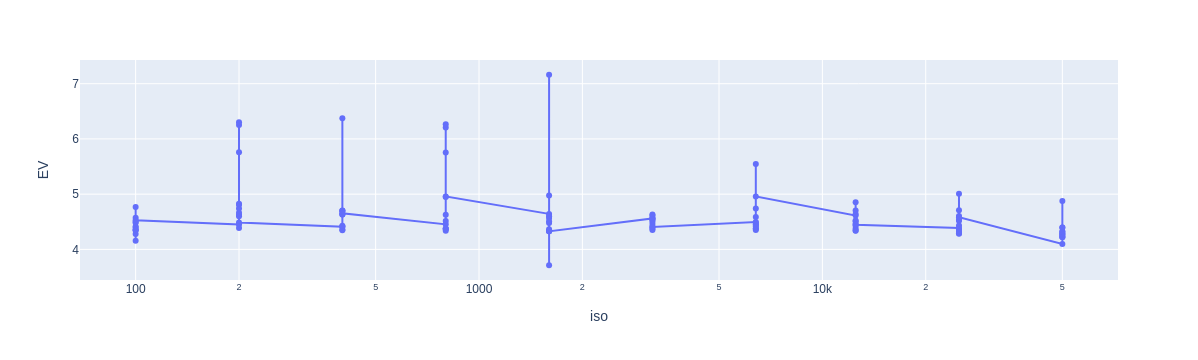

In [76]:
px.line(data, x='iso', y='EV', markers=True, log_x=True)

In [28]:
fn_list

['L1000155.DNG',
 'L1000156.DNG',
 'L1000157.DNG',
 'L1000158.DNG',
 'L1000159.DNG',
 'L1000160.DNG',
 'L1000161.DNG',
 'L1000162.DNG',
 'L1000163.DNG',
 'L1000164.DNG',
 'L1000165.DNG']

In [29]:
fn

'L1000165.DNG'

In [30]:
path = "/home/steven/leica/iso32000"
data = pd.DataFrame()

fn_list = sorted([i for i in os.listdir(path) if i.endswith(suffix)])

for fn_base in fn_list:
    fn = os.path.join(path, fn_base)
    with exiftool.ExifToolHelper() as et:
        metadata = et.get_metadata(fn)[0]
    raw = rawpy.imread(fn)
    
    df = pd.DataFrame({
        'source':[metadata.get('SourceFile')],
        'iso':[metadata.get('EXIF:ISO')],
        'time':[metadata.get('EXIF:ExposureTime')],
        'std':[np.std(raw.raw_image)],
        'mean':[np.mean(raw.raw_image)],
        'white':[raw.white_level],
    })
    data = pd.concat([data, df])
    raw.close()

In [31]:
data

,source,iso,time,std,mean,white
0,/home/steven/leica/iso32000/L1000226.DNG,32000,0.000250,109.803736,2045.607274,16383
0,/home/steven/leica/iso32000/L1000227.DNG,32000,0.000500,109.825697,2045.659666,16383
0,/home/steven/leica/iso32000/L1000228.DNG,32000,0.001000,109.812953,2045.709059,16383
0,/home/steven/leica/iso32000/L1000229.DNG,32000,0.002000,109.863261,2045.812411,16383
0,/home/steven/leica/iso32000/L1000230.DNG,32000,0.004000,109.877819,2045.801118,16383
0,/home/steven/leica/iso32000/L1000231.DNG,32000,0.008000,109.975503,2045.908983,16383
0,/home/steven/leica/iso32000/L1000232.DNG,32000,0.016667,109.960849,2045.993068,16383
0,/home/steven/leica/iso32000/L1000233.DNG,32000,0.033333,110.111332,2046.505823,16383
0,/home/steven/leica/iso32000/L1000234.DNG,32000,0.066667,110.436634,2047.192917,16383
0,/home/steven/leica/iso32000/L1000235.DNG,32000,0.125000,111.019640,2048.444274,16383


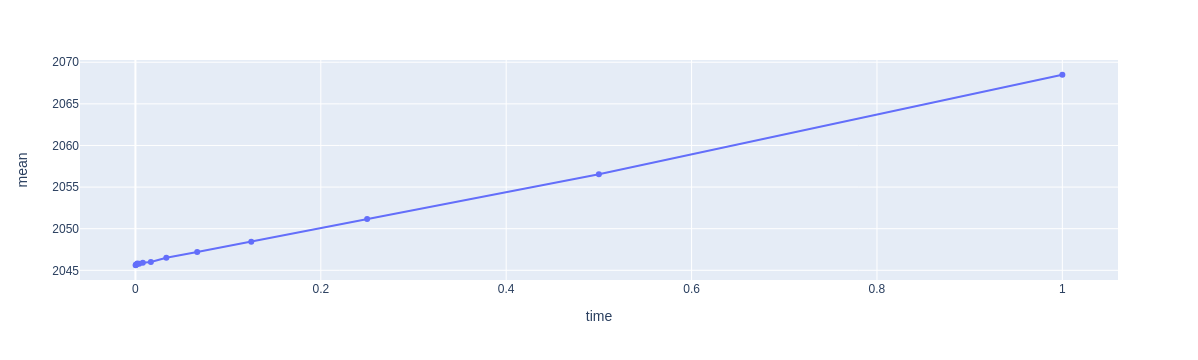

In [32]:
px.line(data, x='time', y='mean', markers=True)

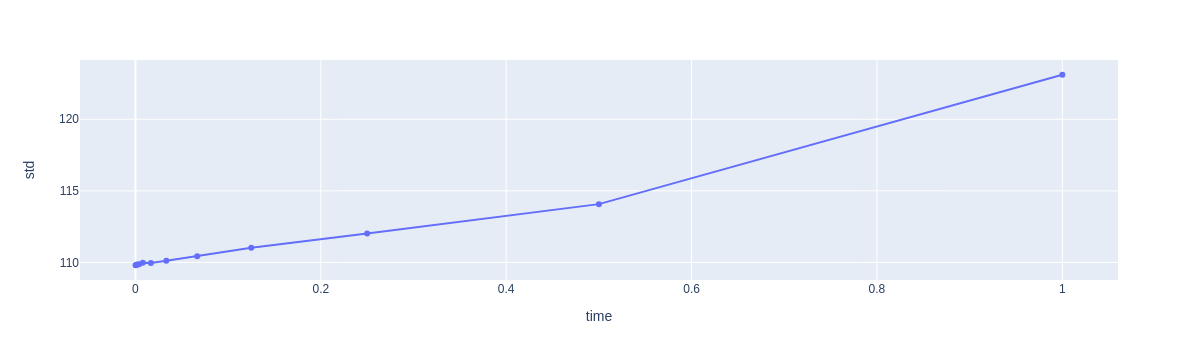

In [33]:
px.line(data, x='time', y='std', markers=True)

## Checking SL2-S mid-ISO

In [88]:
metadata_400 = [i for i in metadata if i.get('EXIF:ISO') == 400]

In [93]:
metadata_400[0].get('SourceFile')

'SL2-S-24MP/L1000647.DNG'

In [97]:
image = rawpy.imread(metadata_400[0].get('SourceFile')).raw_image

In [99]:
imageio.imsave('test.tiff', image)

## Noise on 50% white image on Leica CL

In [10]:
os.getcwd()

'/home/steven/leica'

In [57]:
fn = "/home/steven/leica/CL-24MP-PHOTON/L1040859.DNG"
#fn = "/home/steven/leica/CL-24MP/L1030845.DNG"
with exiftool.ExifToolHelper() as et:
    metadata = et.get_metadata([fn])
metadata

[{'SourceFile': '/home/steven/leica/CL-24MP-PHOTON/L1040859.DNG',
  'ExifTool:ExifToolVersion': 12.4,
  'File:FileName': 'L1040859.DNG',
  'File:Directory': '/home/steven/leica/CL-24MP-PHOTON',
  'File:FileSize': 43585536,
  'File:FileModifyDate': '2023:07:29 07:04:54-06:00',
  'File:FileAccessDate': '2023:07:29 13:05:10-06:00',
  'File:FileInodeChangeDate': '2023:07:29 13:05:10-06:00',
  'File:FilePermissions': 100755,
  'File:FileType': 'DNG',
  'File:FileTypeExtension': 'DNG',
  'File:MIMEType': 'image/x-adobe-dng',
  'File:ExifByteOrder': 'II',
  'EXIF:Make': 'LEICA CAMERA AG',
  'EXIF:Model': 'LEICA CL',
  'EXIF:Orientation': 1,
  'EXIF:Software': 4.1,
  'EXIF:ModifyDate': '2023:07:29 13:04:54',
  'EXIF:Artist': '',
  'EXIF:ImageWidth': 6120,
  'EXIF:ImageHeight': 4016,
  'EXIF:BitsPerSample': 14,
  'EXIF:Compression': 1,
  'EXIF:PhotometricInterpretation': 32803,
  'EXIF:StripOffsets': 573952,
  'EXIF:SamplesPerPixel': 1,
  'EXIF:RowsPerStrip': 4016,
  'EXIF:StripByteCounts': 430

In [59]:
raw = rawpy.imread(fn)

image = raw.raw_image
image = image[:, 0:6048]
image

array([[1658, 1251, 1653, ..., 1605, 2196, 1628],
       [ 933, 1619,  967, ..., 2220, 1165, 2192],
       [1593, 1219, 1621, ..., 1625, 2233, 1621],
       ...,
       [ 955, 1652,  924, ..., 2145, 1178, 2135],
       [1671, 1232, 1616, ..., 1557, 2200, 1548],
       [ 927, 1627,  924, ..., 2128, 1148, 2199]], dtype=uint16)

The dark mean was 511.5m

In [63]:
image.mean() - 511.5

1492.2997148311515

In [ ]:
The dark stddev was 1.5

In [64]:
image.std() - 1.5

542.2570565242263

So for an actual image, the SNR is only

In [65]:
1492/542

2.7527675276752768

In [50]:
image.min()

1

In [51]:
image.max()

16383

Doesn't make sense - the value should be around 50%, but it's much too low. 

Take 2 evenly illuminated images at ISO 100 and subtract

In [108]:
raw1 = rawpy.imread("/home/steven/leica/CL-24MP-PHOTON/L1040860.DNG")
raw2 = rawpy.imread("/home/steven/leica/CL-24MP-PHOTON/L1040861.DNG")
image1 = raw1.raw_image[:, 0:6048]/16383
image2 = raw2.raw_image[:, 0:6048]/16383

In [109]:
image2

array([[0.09766221, 0.07532198, 0.10089727, ..., 0.10065312, 0.13404138,
        0.09595312],
       [0.05658304, 0.10101935, 0.05658304, ..., 0.13141671, 0.07049991,
        0.13239333],
       [0.09924922, 0.07422328, 0.09790637, ..., 0.09876091, 0.13575047,
        0.09888299],
       ...,
       [0.05621681, 0.09790637, 0.05566746, ..., 0.13349203, 0.06854666,
        0.12995178],
       [0.09918818, 0.07648172, 0.09851676, ..., 0.09375572, 0.13166087,
        0.09656351],
       [0.05670512, 0.09680767, 0.05554538, ..., 0.12879204, 0.06952329,
        0.13147775]])

In [112]:
image_diff = (image1 - image2)

In [114]:
image_diff.mean()*16383

-2.364144653199355

In [115]:
image_diff.std()*16383

32.998245941552746

This is the actual photo noise, actually divide by sqrt(2) because it's 2 images. The pattern noise is removed.

In [124]:
33/2**0.5

23.33452377915607

The dark level noramlized to 1 is

In [121]:
511/16383

0.031190868583287554

Using this offset, we get an actual mean of

In [116]:
image1.mean()*16383 - 511

1435.3575191215948

In [117]:
image2.mean()*16383 - 511

1437.7216637747952

In [120]:
np.log(1437/16383)

-2.4336866047412387

I suspect the x-axis of the histogram is a log scale, and I positioned it around the 50% point. 

### Number of photos

The SNR is

In [127]:
1437/23.3

61.67381974248927

The SNR for $n$ photos is $\sqrt{n}$, so $n = 61.67^{2}$

In [129]:
61.7**2

3806.8900000000003

At around ISO 6400 the detector noise becomes higher than 23. Oh, but the photon noise should scale with the gain. 

I'm confused. The photon noise seems much too large. 

## Noise on 180% grey (mid histogram) on Leica CL

In [195]:
os.getcwd()

'/home/steven/leica'

In [197]:
fn1 = "/home/steven/leica/CL-24MP-PHOTON/ISO100_18GREY_A.DNG"
fn2 = "/home/steven/leica/CL-24MP-PHOTON/ISO100_18GREY_B.DNG"
#fn = "/home/steven/leica/CL-24MP/L1030845.DNG"
with exiftool.ExifToolHelper() as et:
    metadata = et.get_metadata([fn])
metadata

[{'SourceFile': '/home/steven/leica/CL-24MP-PHOTON/ISO100_18GREY_A.DNG',
  'ExifTool:ExifToolVersion': 12.4,
  'File:FileName': 'ISO100_18GREY_A.DNG',
  'File:Directory': '/home/steven/leica/CL-24MP-PHOTON',
  'File:FileSize': 43581952,
  'File:FileModifyDate': '2023:07:30 08:52:28-06:00',
  'File:FileAccessDate': '2023:07:30 14:57:14-06:00',
  'File:FileInodeChangeDate': '2023:07:30 14:54:11-06:00',
  'File:FilePermissions': 100755,
  'File:FileType': 'DNG',
  'File:FileTypeExtension': 'DNG',
  'File:MIMEType': 'image/x-adobe-dng',
  'File:ExifByteOrder': 'II',
  'EXIF:Make': 'LEICA CAMERA AG',
  'EXIF:Model': 'LEICA CL',
  'EXIF:Orientation': 1,
  'EXIF:Software': 4.1,
  'EXIF:ModifyDate': '2023:07:30 14:52:28',
  'EXIF:Artist': '',
  'EXIF:ImageWidth': 6120,
  'EXIF:ImageHeight': 4016,
  'EXIF:BitsPerSample': 14,
  'EXIF:Compression': 1,
  'EXIF:PhotometricInterpretation': 32803,
  'EXIF:StripOffsets': 570368,
  'EXIF:SamplesPerPixel': 1,
  'EXIF:RowsPerStrip': 4016,
  'EXIF:StripBy

In [199]:
white_level = metadata[0].get('EXIF:WhiteLevel')

In [200]:
black_level = int(metadata[0].get('EXIF:BlackLevel').split(' ')[0])

In [202]:
levels = white_level - black_level

In [204]:
raw_a = rawpy.imread(fn1)
raw_b = rawpy.imread(fn2)

image1 = raw1.raw_image/levels
image1 = image1[:, 0:6048]
image2 = raw2.raw_image/levels
image2 = image2[:, 0:6048]
image1

array([[0.1041391 , 0.07793108, 0.1014301 , ..., 0.1008631 , 0.13652114,
        0.1008631 ],
       [0.05777106, 0.1049581 , 0.05865306, ..., 0.13986014, 0.07326907,
        0.13708814],
       [0.1024381 , 0.07597808, 0.1019341 , ..., 0.1013671 , 0.13746614,
        0.1005481 ],
       ...,
       [0.05789706, 0.0996031 , 0.05840106, ..., 0.13406413, 0.07402507,
        0.13532414],
       [0.1036351 , 0.07799408, 0.1000441 , ..., 0.0986581 , 0.13500914,
        0.0976501 ],
       [0.05682606, 0.0999181 , 0.05745606, ..., 0.13727714, 0.07169407,
        0.13437913]])

In [207]:
delta = image1 - image2

In [212]:
delta.std()/2**0.5

0.0014699983287679384

In [213]:
delta.mean()

-0.00014894126209282215

In [214]:
image1.mean()

0.12262064632530696

In [211]:
image2.mean()

0.12276958758739953

In [218]:
snr = image1.mean()/(delta.std()/2**0.5)
snr

83.41550049793594

In [220]:
photons = snr**2
photons

6958.14572332115

Got about 3800 using the noisy image. I should manually examine an image to make sure there isn't pattern noise - but subtracting shoudl take care of that.

lux = lumen/s/m**2. 

## Sanity check - fully saturated detectotr

Let's see what a totally saturated detector looks like.

In [96]:
raw1 = rawpy.imread("/home/steven/leica/CL-24MP-PHOTON/L1040864.DNG")
raw2 = rawpy.imread("/home/steven/leica/CL-24MP-PHOTON/L1040865.DNG")
sat1 = raw1.raw_image[:, 0:6048]/16383
sat2 = raw2.raw_image[:, 0:6048]/16383

In [97]:
sat1

array([[0.99993896, 0.99993896, 0.99993896, ..., 0.99993896, 0.99993896,
        0.99993896],
       [0.99993896, 0.99993896, 0.99993896, ..., 0.99993896, 0.99993896,
        0.99993896],
       [0.99993896, 0.99993896, 0.99993896, ..., 0.99993896, 0.99993896,
        0.99993896],
       ...,
       [0.99993896, 0.99993896, 0.99993896, ..., 0.99993896, 0.99993896,
        0.99993896],
       [0.99993896, 0.99993896, 0.99993896, ..., 0.99993896, 0.99993896,
        0.99993896],
       [0.99993896, 0.99993896, 0.99993896, ..., 0.99993896, 0.99993896,
        0.99993896]])

In [105]:
sat2

array([[0.99993896, 0.99993896, 0.99993896, ..., 0.99993896, 0.99993896,
        0.99993896],
       [0.99993896, 0.99993896, 0.99993896, ..., 0.99993896, 0.99993896,
        0.99993896],
       [0.99993896, 0.99993896, 0.99993896, ..., 0.99993896, 0.99993896,
        0.99993896],
       ...,
       [0.99993896, 0.99993896, 0.99993896, ..., 0.99993896, 0.99993896,
        0.99993896],
       [0.99993896, 0.99993896, 0.99993896, ..., 0.99993896, 0.99993896,
        0.99993896],
       [0.99993896, 0.99993896, 0.99993896, ..., 0.99993896, 0.99993896,
        0.99993896]])

In [99]:
image_diff = image1-image2

In [100]:
image_diff.mean()

0.0

In [102]:
image_diff.std()

0.0